# Data download and cleaning. (and more)
It uses two datasets form Estonian open data.  
[Status of vehicles in Estonia](https://avaandmed.eesti.ee/datasets/soidukite-staatused-eestis) and [Roadworthiness tests of land vehicles in Estonia](https://avaandmed.eesti.ee/datasets/maismaasoidukite-tehnoulevaatused-eestis)

### Download data

In [1]:
# SÃµidukite staatused avaandmetena M1 ja M1G 2023.csv from Status... as vehicle_status.csv
# SÃµidukite staatused avaandmetena va M1 ja M1G 2023.csv from Status... as vehicle_status1.csv
# yv_2023.csv from Road... as vehicle_roadworthiness.csv
# RIKKED codes are in file rike.csv from  Road...

In [2]:
import pandas as pd
import numpy as np

# Read vehicle_status.csv
vehicle_status = pd.read_csv('vehicle_status.csv', delimiter=';', low_memory=False)
vehicle_status1 = pd.read_csv('vehicle_status1.csv', delimiter=';', low_memory=False)

vehicle_status = vehicle_status._append(vehicle_status1)

vehicle_roadworthiness = pd.read_csv('vehicle_roadworthiness.csv', delimiter=',')
rikke_koodid = pd.read_csv('rike.csv')

In [3]:
vehicle_roadworthiness.head(10)

,TEHNOYLEVAATUSPUNKT,PUNKTI_KOOD,TOOTAJA,YV_KUUPAEV,YLEVAATUSLIIK,YLEVAATUSOTSUS,RIKKED,SOIDUK_ID,ESMANE_REG_AASTA,MARK,MUDEL,KATEGOORIA,KERETYYP
0,Amserv Viljandi,DE,685,2023-05,KORDUV,KORRAS,NaN,1,2005,TOYOTA,COROLLA,M1,UNIVERSAAL
1,A-Ülevaatus OÜ (Rae),MR,782,2023-04,KORRALINE,KORRAS,NaN,2,2008,AUDI,A4,M1,LAHTINE
2,3D Auto OÜ,TR,932,2023-05,KORDUV,KORRAS,NaN,3,2002,NISSAN,PRIMERA,M1,SEDAAN
3,JarmaAuto OÜ,MJ,877,2023-04,KORRALINE,KORRAS,NaN,4,2019,RENAULT,TALISMAN,M1,UNIVERSAAL
4,E-Tehno OÜ (Tartu Turu tn),TO,888,2023-04,KORRALINE,KORRAS,NaN,5,2005,RESPO,751,O1,MADEL
5,AK Tehno OÜ,MN,516,2023-08,KORRALINE,KORDUVALE,VO:100101460;OV:100103732;OV:100104074;OV:1001...,6,2003,KIA,CARENS,M1,UNIVERSAAL
6,A-Ülevaatus OÜ (Kiiu),MG,119,2023-10,KORRALINE,KORRAS,VO:100103907,7,2014,FORD,FOCUS,M1,LUUKPÄRA
7,Metra AP OÜ,KM,339,2023-03,KORRALINE,KORRAS,NaN,8,2012,OMAVALMISTATUD,OMAVALMISTATUD,R3B,KALLUR
8,E-Tehno OÜ (Elva),TF,764,2023-06,KORRALINE,KORRAS,NaN,9,2014,TIKI,TP385-DLB,O2,SIHTOTSTARBELINE
9,A-Ülevaatus OÜ (Revo),AH,658,2023-08,KORRALINE,KORRAS,NaN,10,2007,TOYOTA,COROLLA,M1,SEDAAN


In [4]:
vehicle_status.head(10)

,Andmed seisuga,YLDINE_STAATUS,EESTIS_ESMAREG_KP,ESMANE_REG_KP,KAIGUKASTI_TYYP,Kütuse tüüp,MOOTORI_TYYP,MOOTORI_MAHT,MOOTORI_VOIMSUS,HYBRIIDI_TYYP,...,TAISMASS,TYHIMASS,TELGI_KOKKU,HEITMENORM,VARV,ISTEKOHTI,Kere nimetus,VK/OM MAAKOND,VK/OM TYYP_,ARV
0,01.12.2023,PEATATUD,01.01.0987,01.01.1987,NaN,BENSIIN,BENSIIN,1452.0,55.0,NaN,...,1510.0,1050.0,2.0,NaN,BEEZ,5.0,UNIVERSAAL,PÕLVA MAAKOND,FYYSILINE,1
1,01.12.2023,PEATATUD,30.12.1899,01.01.1987,NaN,DIISEL,DIISEL,1608.0,40.0,NaN,...,1350.0,910.0,2.0,NaN,BEEZ,5.0,LUUKPÄRA,HARJU MAAKOND,FYYSILINE,1
2,01.12.2023,PEATATUD,01.01.1900,01.01.1939,NaN,BENSIIN,BENSIIN,690.0,15.0,NaN,...,1120.0,750.0,2.0,NaN,MUST,4.0,KUPEE,HARJU MAAKOND,FYYSILINE,1
3,01.12.2023,PEATATUD,01.01.1900,01.01.1939,NaN,BENSIIN,BENSIIN,2120.0,58.0,NaN,...,2020.0,1430.0,2.0,NaN,HALL,5.0,SEDAAN,TARTU MAAKOND,FYYSILINE,1
4,01.12.2023,PEATATUD,01.01.1900,01.01.1948,MANUAAL,BENSIIN,BENSIIN,2445.0,52.0,NaN,...,1550.0,1050.0,2.0,NaN,ROHELINE,5.0,LUUKPÄRA,SAARE MAAKOND,JURIIDILINE,1
5,01.12.2023,PEATATUD,01.01.1900,01.01.1954,NaN,BENSIIN,BENSIIN,2120.0,38.0,NaN,...,1960.0,1535.0,2.0,NaN,ROHELINE,5.0,LAHTINE,JÄRVA MAAKOND,FYYSILINE,1
6,01.12.2023,PEATATUD,01.01.1900,01.01.1955,NaN,BENSIIN,BENSIIN,NaN,38.0,NaN,...,1835.0,1460.0,2.0,NaN,HALL,5.0,SEDAAN,VILJANDI MAAKOND,FYYSILINE,1
7,01.12.2023,PEATATUD,01.01.1900,01.01.1958,NaN,BENSIIN,BENSIIN,2445.0,74.0,NaN,...,1835.0,1385.0,2.0,NaN,TUMEROHELINE,5.0,SEDAAN,RAPLA MAAKOND,FYYSILINE,1
8,01.12.2023,PEATATUD,01.01.1900,01.01.1961,NaN,BENSIIN,BENSIIN,2445.0,52.0,NaN,...,1885.0,1460.0,2.0,NaN,HELEROHELINE,5.0,SEDAAN,IDA-VIRU MAAKOND,FYYSILINE,1
9,01.12.2023,PEATATUD,01.01.1900,01.01.1969,NaN,BENSIIN,BENSIIN,2012.0,36.0,NaN,...,2175.0,1525.0,2.0,NaN,ROHELINE,8.0,LAHTINE,VÕRU MAAKOND,FYYSILINE,1


In [5]:
for c in vehicle_status.columns:
    print(f"\n\n\n{c}")
    print(vehicle_status[c].value_counts())




Andmed seisuga
01.12.2023    1290757
Name: Andmed seisuga, dtype: int64



YLDINE_STAATUS
REGISTREERITUD    996633
PEATATUD          294124
Name: YLDINE_STAATUS, dtype: int64



EESTIS_ESMAREG_KP
01.01.1900    2582
01.01.1990    1155
01.01.1989     894
01.01.1988     887
01.01.1987     847
              ... 
02.10.1953       1
29.08.1953       1
18.07.1953       1
19.06.1953       1
01.01.0987       1
Name: EESTIS_ESMAREG_KP, Length: 15263, dtype: int64



ESMANE_REG_KP
01.01.1991    12664
01.01.1988    12082
01.01.1989    12060
01.01.1990    11716
01.01.1987    11041
              ...  
20.06.1958        1
09.09.1958        1
21.01.1959        1
07.03.1959        1
29.09.2013        1
Name: ESMANE_REG_KP, Length: 15941, dtype: int64



KAIGUKASTI_TYYP
MANUAAL                475527
AUTOMAAT               366352
CVT                     76820
KONSTANTNE_YLEKANNE      1798
AUTOMAT_MANUAAL           973
MUU                       659
DCT                       219
HYDRAULILINE            

HARJU MAAKOND         503530
TARTU MAAKOND         148506
IDA-VIRU MAAKOND       90645
PÄRNU MAAKOND          89984
LÄÄNE-VIRU MAAKOND     65389
VILJANDI MAAKOND       53759
VÕRU MAAKOND           45336
SAARE MAAKOND          44379
RAPLA MAAKOND          42290
JÄRVA MAAKOND          35924
JÕGEVA MAAKOND         34885
PÕLVA MAAKOND          34409
VALGA MAAKOND          32148
MÄÄRAMATA              31633
LÄÄNE MAAKOND          23245
HIIU MAAKOND           14695
Name: VK/OM MAAKOND, dtype: int64



VK/OM TYYP_
FYYSILINE      982530
JURIIDILINE    308207
Name: VK/OM TYYP_, dtype: int64



ARV
1    1289873
2        747
3         94
4         21
5         15
6          4
9          1
8          1
7          1
Name: ARV, dtype: int64


## Remove data that is not relavant

In [6]:
# Remove removed vehicles
data_status = vehicle_status[vehicle_status['YLDINE_STAATUS'] == 'REGISTREERITUD'] 
# Remove where county is not set
data_status = data_status[data_status['VK/OM MAAKOND'] != 'MÄÄRAMATA']
# Leave only classes M1, M1G, N1, N1G
#   M1, M1G - Vehicles used for carriage of passengers, 
#         comprising not more than eight seats in addition to the driver's = 9 + offroad
#   N1, N1G - Vehicles used for the carriage of goods and having a maximum mass 
#         not exceeding 3.5 tonnes. (Pick-up Truck, Van) + offroad
data_status = data_status[(data_status['Kategooria'] == 'M1G') | (data_status['Kategooria'] == 'M1') | (data_status['Kategooria'] == 'N1G') | (data_status['Kategooria'] == 'N1')]

In [7]:
for c in data_status.columns:
    print(f"\n\n\n{c}")
    print(data_status[c].value_counts())




Andmed seisuga
01.12.2023    734958
Name: Andmed seisuga, dtype: int64



YLDINE_STAATUS
REGISTREERITUD    734958
Name: YLDINE_STAATUS, dtype: int64



EESTIS_ESMAREG_KP
30.11.2023    434
31.10.2023    412
29.09.2023    366
31.10.2022    359
02.01.2018    356
             ... 
27.09.1988      1
06.10.1988      1
02.03.1995      1
14.10.1988      1
29.12.2001      1
Name: EESTIS_ESMAREG_KP, Length: 10538, dtype: int64



ESMANE_REG_KP
01.01.1991    1134
01.01.1992    1086
01.01.2003    1035
01.01.1997    1025
01.01.1989    1017
              ... 
09.03.1996       1
09.09.2001       1
26.07.2009       1
17.07.1999       1
29.09.2013       1
Name: ESMANE_REG_KP, Length: 12336, dtype: int64



KAIGUKASTI_TYYP
MANUAAL                338524
AUTOMAAT               312107
CVT                     54647
KONSTANTNE_YLEKANNE      1772
MUU                       430
DCT                       197
AUTOMAT_MANUAAL            41
AMT                         2
Name: KAIGUKASTI_TYYP, dtype: int64



Küt

In [8]:
# Replace some values to make less values.
data_status.loc[(data_status['KAIGUKASTI_TYYP'] == 'KONSTANTNE_YLEKANNE') | 
                (data_status['KAIGUKASTI_TYYP'] == 'DCT') | 
                (data_status['KAIGUKASTI_TYYP'] == 'AUTOMAT_MANUAAL') | 
                (data_status['KAIGUKASTI_TYYP'] == 'AMT'), 'KAIGUKASTI_TYYP'] = 'MUU'
# katalüsaatori nõue on ELi seatud, vanematel seda pole/valesri registreeritud
data_status.loc[data_status['MOOTORI_TYYP'] == 'BENSIIN_KATALYSAATOR', 'MOOTORI_TYYP'] = 'BENSIIN' 
# removes complexion, based on statistics
data_status.loc[data_status['MOOTORI_TYYP'] == 'BENSIIN_HYBRIID', 'MOOTORI_TYYP'] = 'BENSIIN-ELEKTER'
data_status.loc[data_status['MOOTORI_TYYP'] == 'DIISEL_HYBRIID', 'MOOTORI_TYYP'] = 'DIISEL-ELEKTER'
                
# To check motor type use MOOTORI_TYYP, gives fule as well.

## Find and visulize nice statistics (Status)

In [9]:
%matplotlib inline
import plotnine as p9
# Imports
# Constants
DPI = 900
COUNTYS = ['HARJU MAAKOND', 'TARTU MAAKOND', 'IDA-VIRU MAAKOND', 'PÄRNU MAAKOND', 'LÄÄNE-VIRU MAAKOND', 'VILJANDI MAAKOND', 
           'VÕRU MAAKOND', 'SAARE MAAKOND', 'RAPLA MAAKOND', 'JÄRVA MAAKOND', 'JÕGEVA MAAKOND', 'PÕLVA MAAKOND', 
           'VALGA MAAKOND', 'LÄÄNE MAAKOND', 'HIIU MAAKOND']
county_data = pd.DataFrame({'area': [4327, 1032, 2972, 2545, 2674, 1816, 3696, 2165, 5419, 2765, 2938, 3349, 1917, 3420, 2305],
    'population': [638076, 8474, 133358, 27739, 30072, 20688, 59608, 24036, 87418, 34038, 31919, 162390, 28114, 45637, 34317],
    'population_density': [147.46, 8.21, 44.87, 10.90, 11.25, 11.40, 16.13, 11.10, 16.13, 12.31, 10.86, 54.26, 14.67, 13.37, 14.89],
    'county': ['HARJU MAAKOND', 'HIIU MAAKOND', 'IDA-VIRU MAAKOND', 'JÕGEVA MAAKOND', 'JÄRVA MAAKOND', 
                'LÄÄNE MAAKOND', 'LÄÄNE-VIRU MAAKOND', 'PÕLVA MAAKOND', 'PÄRNU MAAKOND', 'RAPLA MAAKOND', 
                'SAARE MAAKOND', 'TARTU MAAKOND', 'VALGA MAAKOND', 'VILJANDI MAAKOND', 'VÕRU MAAKOND']})

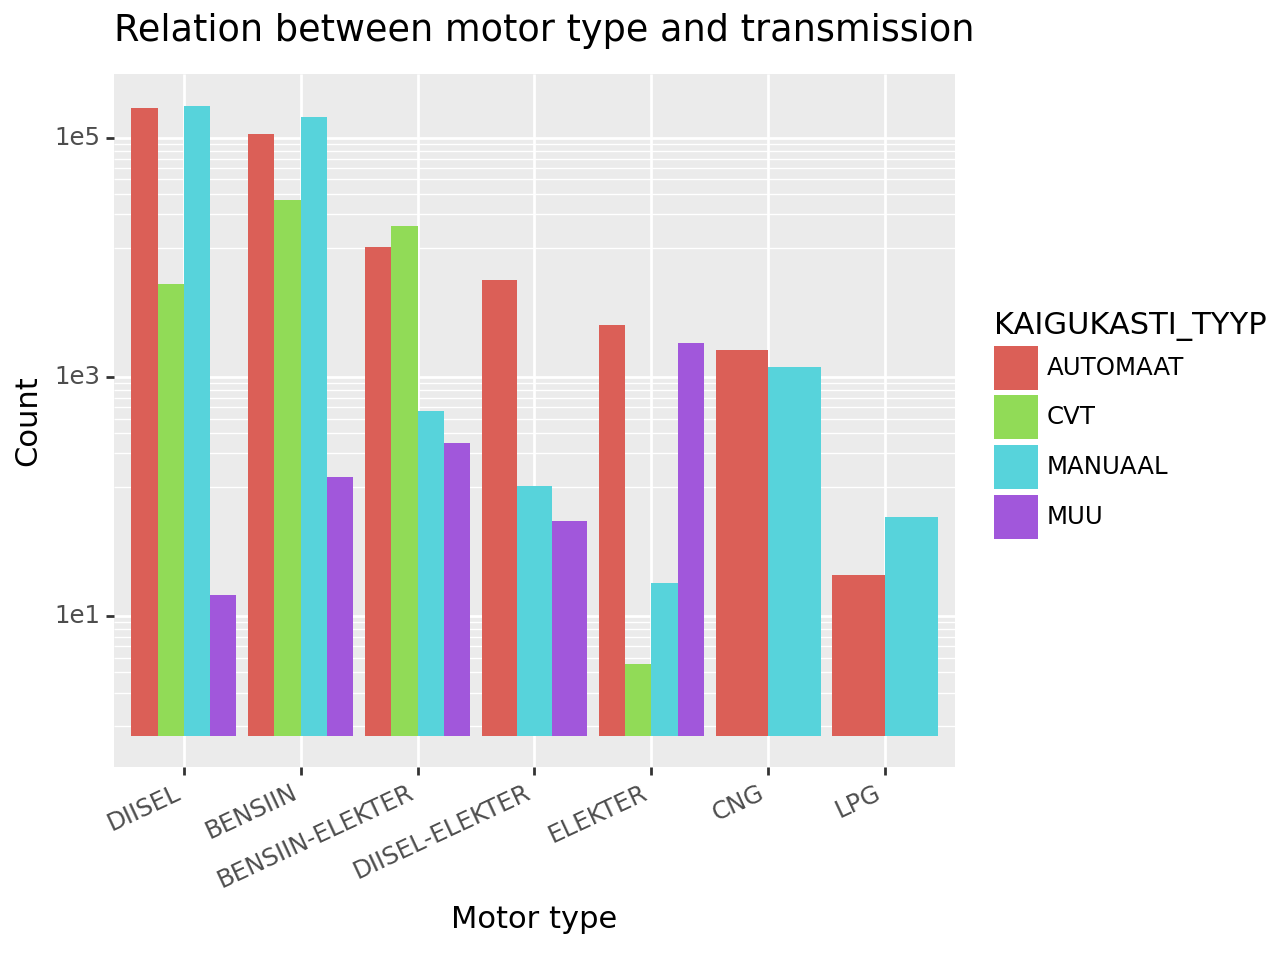

In [10]:
# Motor vs transmission
tmp1 = data_status.groupby(['MOOTORI_TYYP', 'KAIGUKASTI_TYYP']).size().reset_index(name='count')
sort = data_status['MOOTORI_TYYP'].value_counts().index.tolist()
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'MOOTORI_TYYP', y='count', fill = 'KAIGUKASTI_TYYP'),
 )+ p9.scale_y_log10()
  +  p9.geom_bar(position = 'dodge', stat='identity')
  + p9.scale_x_discrete(limits=sort)
  + p9.labs(x='Motor type', y='Count', color='Transmission type')
  + p9.ggtitle('Relation between motor type and transmission')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1), 
             legend_background=p9.element_rect(color='#00000000', size=2, fill='#00000000'))
).draw(show=True)
fig.savefig('img/motor_transmission.png', dpi=DPI, transparent=True)

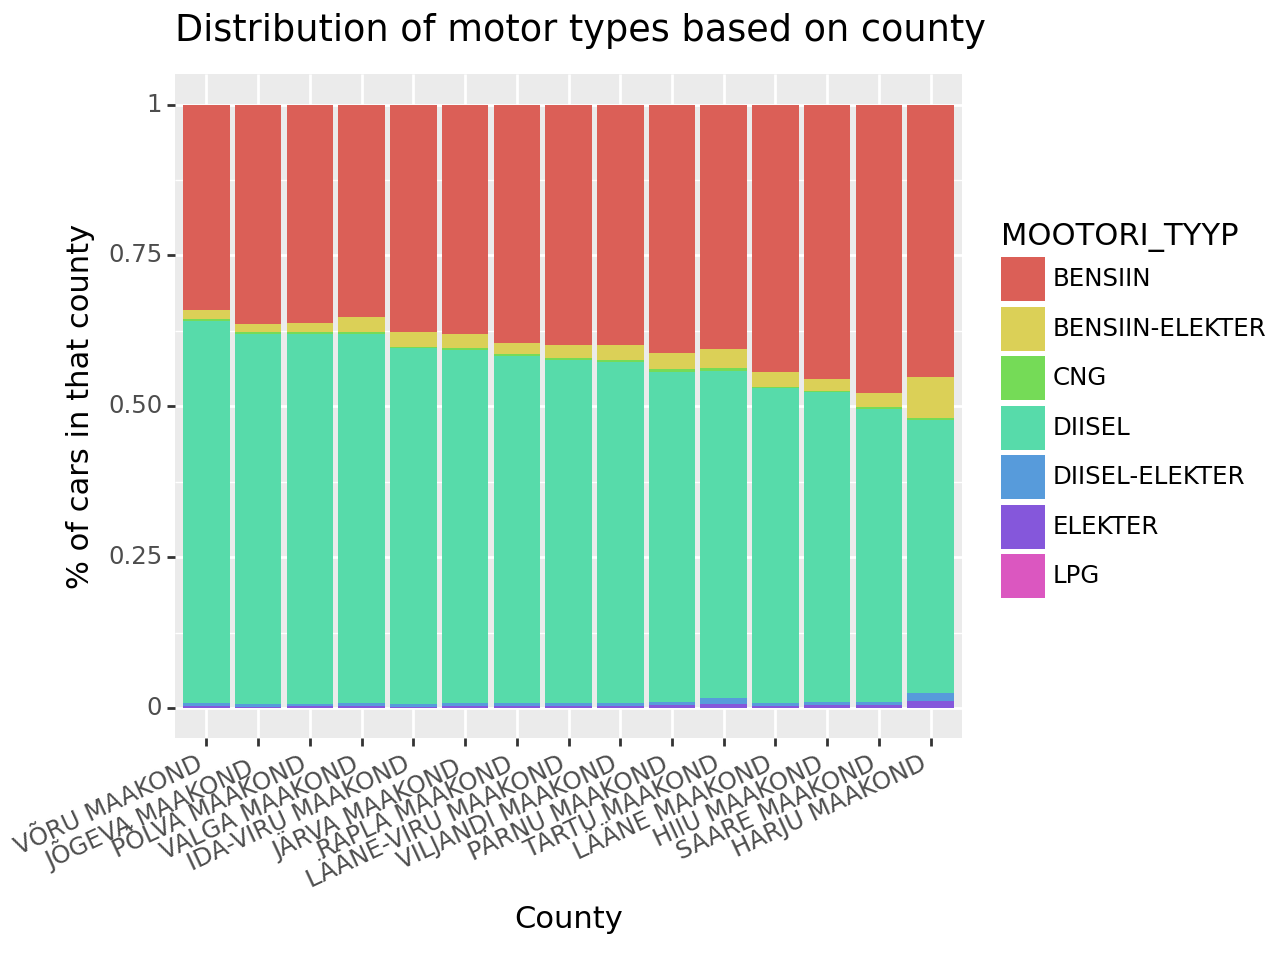

In [11]:
tmp1 = data_status.groupby(['VK/OM MAAKOND', 'MOOTORI_TYYP']).size().reset_index(name='count')
tmp2 =data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def norm_on_county(row):
    return row['count'] / tmp2[tmp2['VK/OM MAAKOND'] == row['VK/OM MAAKOND']].iloc[0, 1]
tmp1['count_norm'] = tmp1.apply(norm_on_county, axis=1)

tmp3 = tmp1[tmp1['MOOTORI_TYYP'] == 'DIISEL'].sort_values(by=['count_norm'], ascending=False)
sort = tmp3['VK/OM MAAKOND'].value_counts().index.tolist()

fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='count', fill = 'MOOTORI_TYYP'),
 )+  p9.geom_bar(position = 'fill', stat='identity')
  + p9.scale_x_discrete(limits=sort)
  + p9.labs(x='County', y='\n\n% of cars in that county', color='Transmission type')
  + p9.ggtitle('Distribution of motor types based on county')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1), 
             legend_background=p9.element_rect(color='#00000000', size=2, fill='#00000000'))
).draw(show=True)
fig.savefig('img/motor_based_on_county.png', dpi=DPI, transparent=True)

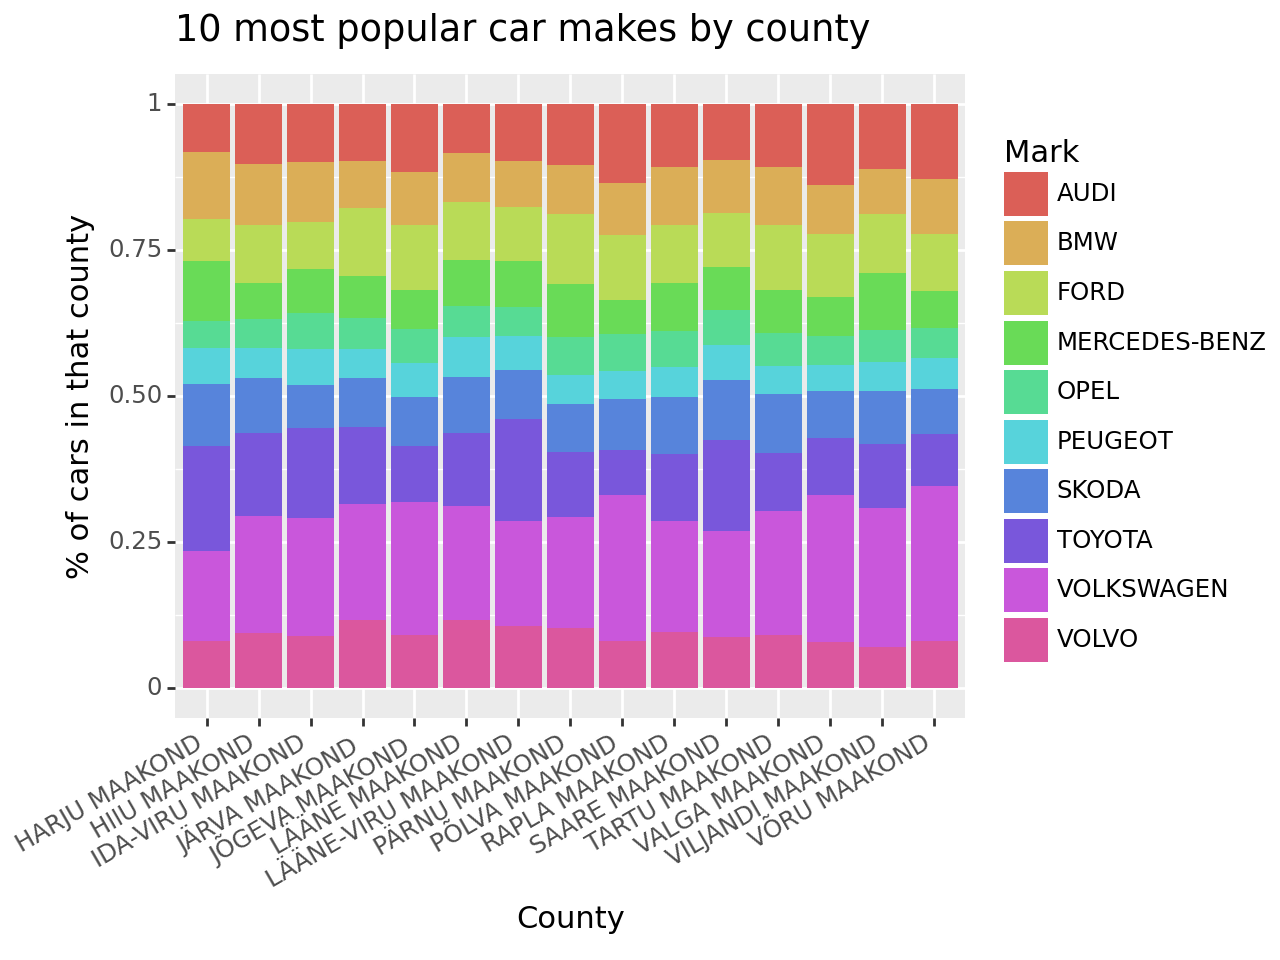

In [12]:
tmp1 = data_status.groupby(['VK/OM MAAKOND', 'Mark']).size().reset_index(name='count')
tmp2 =data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def norm_on_county(row):
    return row['count'] / tmp2[tmp2['VK/OM MAAKOND'] == row['VK/OM MAAKOND']].iloc[0, 1]
def popular_marks(n):
    tmp = data_status.groupby(['Mark']).size().reset_index(name='total_count')
    tmp = tmp.sort_values(by=['total_count'], ascending=False).head(n)['Mark'].values
    return tmp
popular = popular_marks(10)
tmp1 = tmp1[tmp1['Mark'].isin(popular)]
#tmp1['count_norm'] = tmp1.apply(norm_on_county, axis=1)
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='count', fill = 'Mark'),
 )+  p9.geom_bar(position = 'fill', stat='identity')
  + p9.labs(x='County', y='\n\n% of cars in that county', color='Mark')
  + p9.ggtitle('10 most popular car makes by county')
  + p9.theme(axis_text_x=p9.element_text(rotation=30, hjust=1), 
             legend_background=p9.element_rect(color='#00000000', size=2, fill='#00000000'))
).draw(show=True)
fig.savefig('img/mark_based_on_county.png', dpi=DPI, transparent=True)

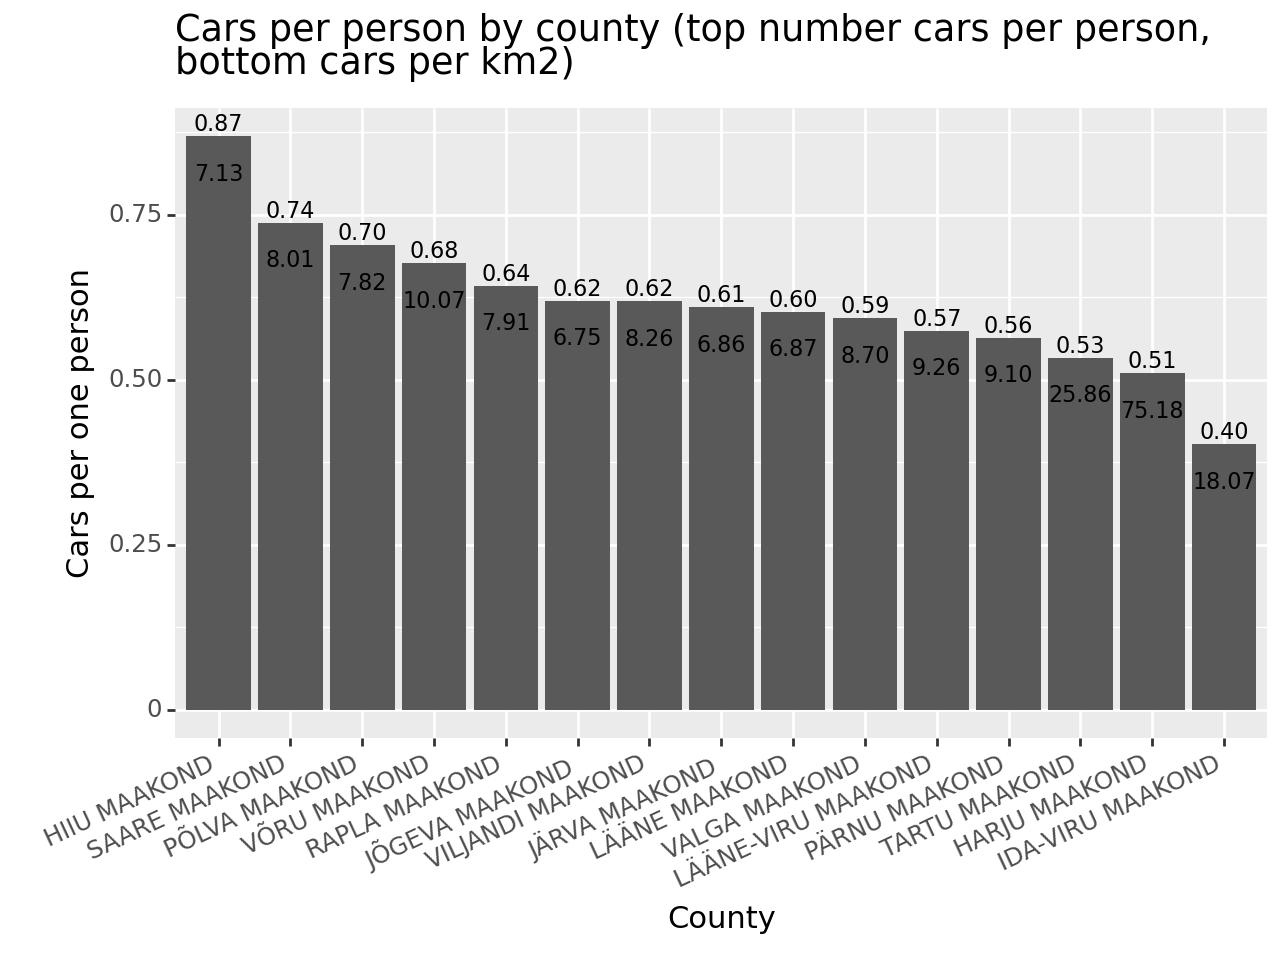

In [13]:
tmp1 = data_status.groupby(['VK/OM MAAKOND']).size().reset_index(name='total_count')
def cars_per_person(row):
    return row['total_count'] / county_data[county_data['county'] == row['VK/OM MAAKOND']].iloc[0]['population']
def cars_per_sqkm(row):
    return row['total_count'] / county_data[county_data['county'] == row['VK/OM MAAKOND']].iloc[0]['area']
tmp1['cars_per_person'] = tmp1.apply(cars_per_person, axis=1)
tmp1['cars_per_square_km'] = tmp1.apply(cars_per_sqkm, axis=1)
tmp1 = tmp1.sort_values(by=['cars_per_person'], ascending=False)
sort = tmp1['VK/OM MAAKOND'].value_counts().index.tolist()
fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'VK/OM MAAKOND', y='cars_per_person'),
 )+ p9.geom_bar(stat='identity')
  + p9.geom_text(p9.aes(label='cars_per_person'), va='bottom', format_string='{:.2f}', size=8)
  + p9.geom_text(p9.aes(label='cars_per_square_km'), va='top', format_string='\n{:.2f}', size=8)
  + p9.scale_x_discrete(limits=sort)
  + p9.labs(x='County', y='\n\nCars per one person')
  + p9.ggtitle('Cars per person by county (top number cars per person,\nbottom cars per km2)')
  + p9.theme(axis_text_x=p9.element_text(rotation=25, hjust=1))
).draw(show=True)
fig.savefig('img/cars_per_person.png', dpi=DPI, transparent=True)

## Find and visulize nice statistics (Tests)

In [14]:
# Data from 2023 only
data_road = vehicle_roadworthiness
data_road = data_road[data_road['KATEGOORIA'].isin(['M1G', 'M1', 'N1', 'N1G'])]
data_road = data_road[data_road['YLEVAATUSLIIK'].isin(['KORRALINE', 'KORDUV'])]

In [15]:
data_road.shape

(475273, 13)

In [16]:
# OV - Oluline viga, EOV - Rohkem oluline
# VO - Väheoluline viga
fault_codes = {"OV": dict(), "VO": dict(), "EOV": dict()}
def count_codes(code):
    for c in code.split(';'):
        p, s = c.split(':')
        if s in fault_codes[p]:
            fault_codes[p][s] +=1
        else:
            fault_codes[p][s] = 1
for i in data_road[data_road['RIKKED'].notna()]['RIKKED']:
    count_codes(str(i))

top_ov_codes = sorted(fault_codes['OV'], key=fault_codes['OV'].get, reverse=True)[:10]
top_vo_codes = sorted(fault_codes['VO'], key=fault_codes['VO'].get, reverse=True)[:10]
top_eov_codes = sorted(fault_codes['EOV'], key=fault_codes['EOV'].get, reverse=True)[:10]

In [17]:
def resolve_sub_group(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if row['TYYP'] == 'ALAMGRUPP':
        return row['ID']
    return resolve_sub_group(row['VANEM_ID'])


def resolve_group(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if row['TYYP'] == 'GRUPP':
        return row['ID']
    return resolve_group(row['VANEM_ID'])

def resolve_name(code):
    row = rikke_koodid[rikke_koodid['ID'] == code].iloc[0]
    if np.isnan(row['VANEM_ID']):
        return row['NIMETUS']
    return resolve_name(row['VANEM_ID']) + " " + row['NIMETUS']

In [18]:
# Top 10 - OV
for i in top_ov_codes:
    print(fault_codes['OV'][i], resolve_name(int(i)))

14540 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri tõhusus. Pidurdustõhusus on ebapiisav.
8199 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri toimimine. Ühe ratta pidurdusjõud erineb rohkem kui 70% sama telje teise ratta maksimaalsest mõõdetud pidurdusjõust. Teekatse puhul kaldub sõiduk liigselt sirgjoonelt kõrvale.
7960 SAASTED Heitgaasid Ottomootori heitmed Ottomootori heitgaasid Heitgaasid ületavad nõuetega ettenähtud piirväärtuseid.
6713 SAASTED Muud keskkonnaga seotud puudused Vedelikulekked Mistahes vedelikuleke (v.a. vesi), mis võib kujutada ohtu teistele liiklejatele või keskkonnale.
6079 TULED, HELKURID JA ELEKTRISEADMED Piduritulelaternad Piduritulelaternate seisund ja toimimine Valgusallikas on defektne või puudub (latern koosneb üksikust piduritule valgusallikast või mitmest piduritule valgusallikast koosneval laternal on üle 1/3 valgusallikatest defektsed).
5942 JUHTIMISSEADE Mehaaniline seisund Roolihoovastiku seisund Liigend on kulunud.
5735 TEL

In [19]:
# Top 10 - VO
for i in top_vo_codes:
    print(fault_codes['VO'][i], resolve_name(int(i)))

46711 MUU VARUSTUS Tulekustuti Puudub, ei vasta nõuetele või on kohustuslikus korras kontrollimata.
22817 TULED, HELKURID JA ELEKTRISEADMED Tagumise registreerimismärgitule latern. Tagumise registreerimismärgitule laterna seisund ja toimimine. Registreerimismärk on osaliselt valgustamata.
15797 TULED, HELKURID JA ELEKTRISEADMED Lähi- ja kaugtulelaternad Lähi- ja kaugtulelaternate seisund ja toimimine Laterna seisukord on halvenenud.
13598 TELJED, VELJED, REHVID, VEDRUSTUS Vedrustus. Vedrud ja stabilisaator. Stabilisaatori puksil või kuulliigendis esineb lõtkusid.
12159 TULED, HELKURID JA ELEKTRISEADMED Lähi- ja kaugtulelaternad Lähitulelaternate reguleeritus Reguleerimata - valgusvihu langemisnurk üle tootja ettenähtud langemisnurga.
12152 TULED, HELKURID JA ELEKTRISEADMED Ääretulelaternad ning päevatulelaternad Ääre- ja päevatulelaternate seisund ja toimimine Ääretule valgusallikas on defektne või puudub (mitmest ääretule valgusallikast koosneval laternal on üle 1/3 valgusallikatest d

In [20]:
# Top 10 - EOV
for i in top_eov_codes:
    print(fault_codes['EOV'][i], resolve_name(int(i)))

514 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Torud või ühenduskohad lekivad.
214 TULED, HELKURID JA ELEKTRISEADMED Piduritulelaternad Piduritulelaternate seisund ja toimimine Ükski piduritulelatern ei põle.
132 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Töösilindrid (sh vedruakud või hüdraulilised silindrid) ja pidurisadul. Lekib.
81 TELJED, VELJED, REHVID, VEDRUSTUS Veljed ja rehvid. Rehvid. Koord on nähtav või katki.
59 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Torud on oluliselt kahjustunud või korrodeerunud.
56 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Elastsed pidurivoolikud. Voolikud või ühenduskohad lekivad.
52 PIDURISÜSTEEM Mehaaniline seisund ja toimimine Jäigad piduritorud. Ilmne purunemise või murdumise oht.
49 PIDURISÜSTEEM Seisupiduri toimimine ja tõhusus Seisupiduri toimimine. Ühe või enama ratta pidur on töökõlbmatu.
38 RAAM, KERE JA SELLELE KINNITATAVAD OSAD Raam, kere ja sellele kinnitatavad osad Kütusepaak ja

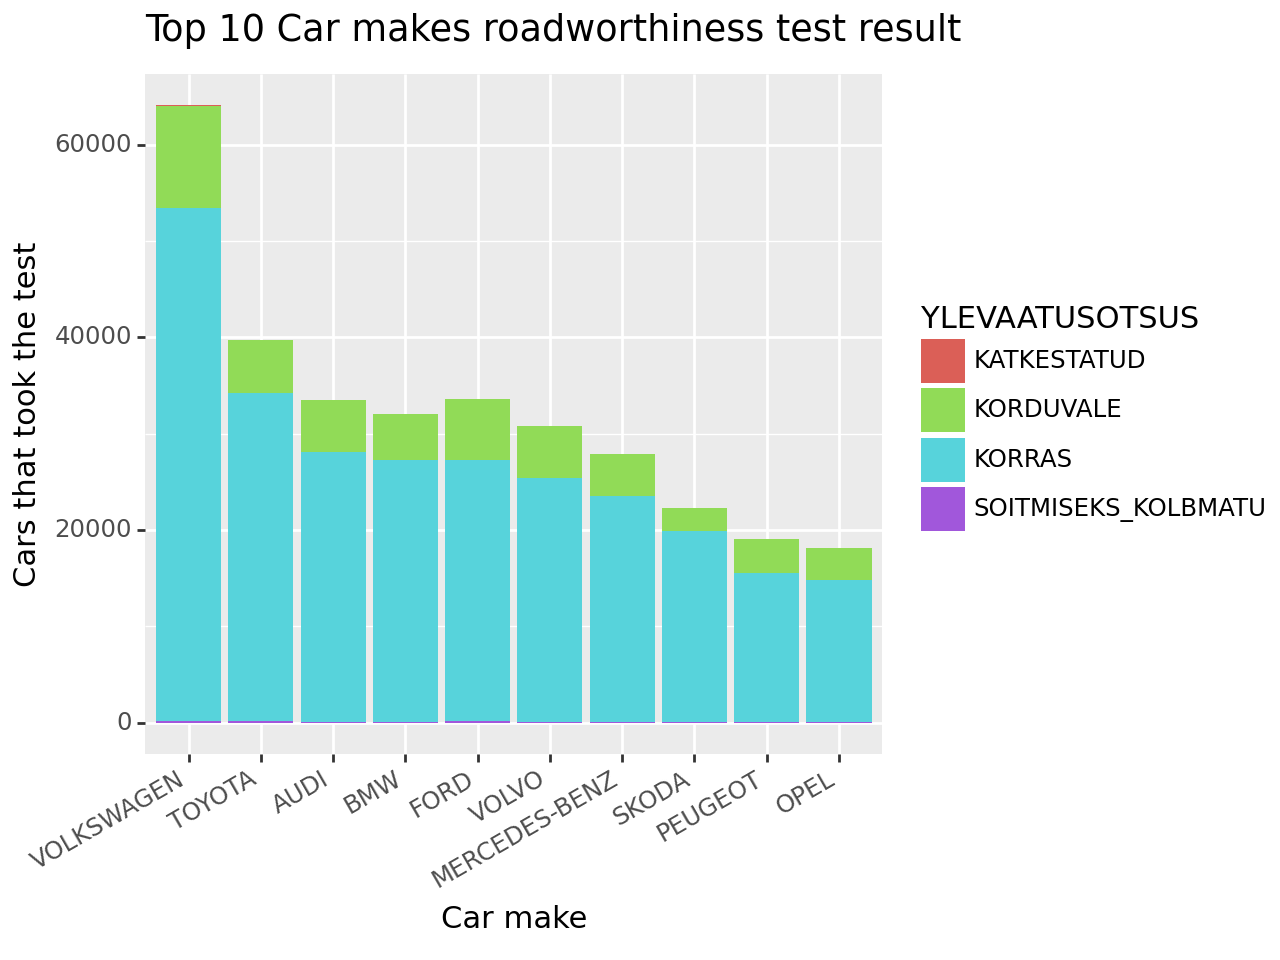

In [21]:
# This is not good, does not show much

tmp1 = data_road.groupby(['YLEVAATUSOTSUS', 'MARK']).size().reset_index(name='count')
tmp2 =data_road.groupby(['MARK']).size().reset_index(name='total_count')

def norm_on_fail(row):
    return row['count'] / tmp2[tmp2['MARK'] == row['MARK']].iloc[0, 1]
def popular_marks2(n):
    tmp = data_road.groupby(['MARK']).size().reset_index(name='total_count')
    tmp = tmp.sort_values(by=['total_count'], ascending=False).head(n)['MARK'].values
    return tmp

popular = popular_marks(10)
tmp1 = tmp1[tmp1['MARK'].isin(popular)]
tmp1 = tmp1.sort_values(by=['count'], ascending=False)
sort = tmp1['MARK'].value_counts().index.tolist()

fig = (
p9.ggplot(
    data = tmp1, 
    mapping = p9.aes(x = 'MARK', y='count', fill = 'YLEVAATUSOTSUS'),
 )+  p9.geom_bar(position = 'stack', stat='identity')
  + p9.scale_x_discrete(limits=sort)
  + p9.labs(x='Car make', y='Cars that took the test', color='Mark')
  + p9.ggtitle('Top 10 Car makes roadworthiness test result')
  + p9.theme(axis_text_x=p9.element_text(rotation=30, hjust=1), 
             legend_background=p9.element_rect(color='#00000000', size=2, fill='#00000000'))
).draw(show=True)
fig.savefig('img/cars_roadworthiness_by_make.png', dpi=DPI, transparent=True)

Index(['Andmed seisuga', 'YLDINE_STAATUS', 'EESTIS_ESMAREG_KP',
       'ESMANE_REG_KP', 'KAIGUKASTI_TYYP', 'Kütuse tüüp', 'MOOTORI_TYYP',
       'MOOTORI_MAHT', 'MOOTORI_VOIMSUS', 'HYBRIIDI_TYYP',
       'Kütusekombinatsioon', 'CO2_NEDC', 'CO2_WLTP', 'Kategooria', 'Keretüüp',
       'Mark', 'Mudel', 'REG_MASS', 'TAISMASS', 'TYHIMASS', 'TELGI_KOKKU',
       'HEITMENORM', 'VARV', 'ISTEKOHTI', 'Kere nimetus', 'VK/OM MAAKOND',
       'VK/OM TYYP_', 'ARV'],
      dtype='object')


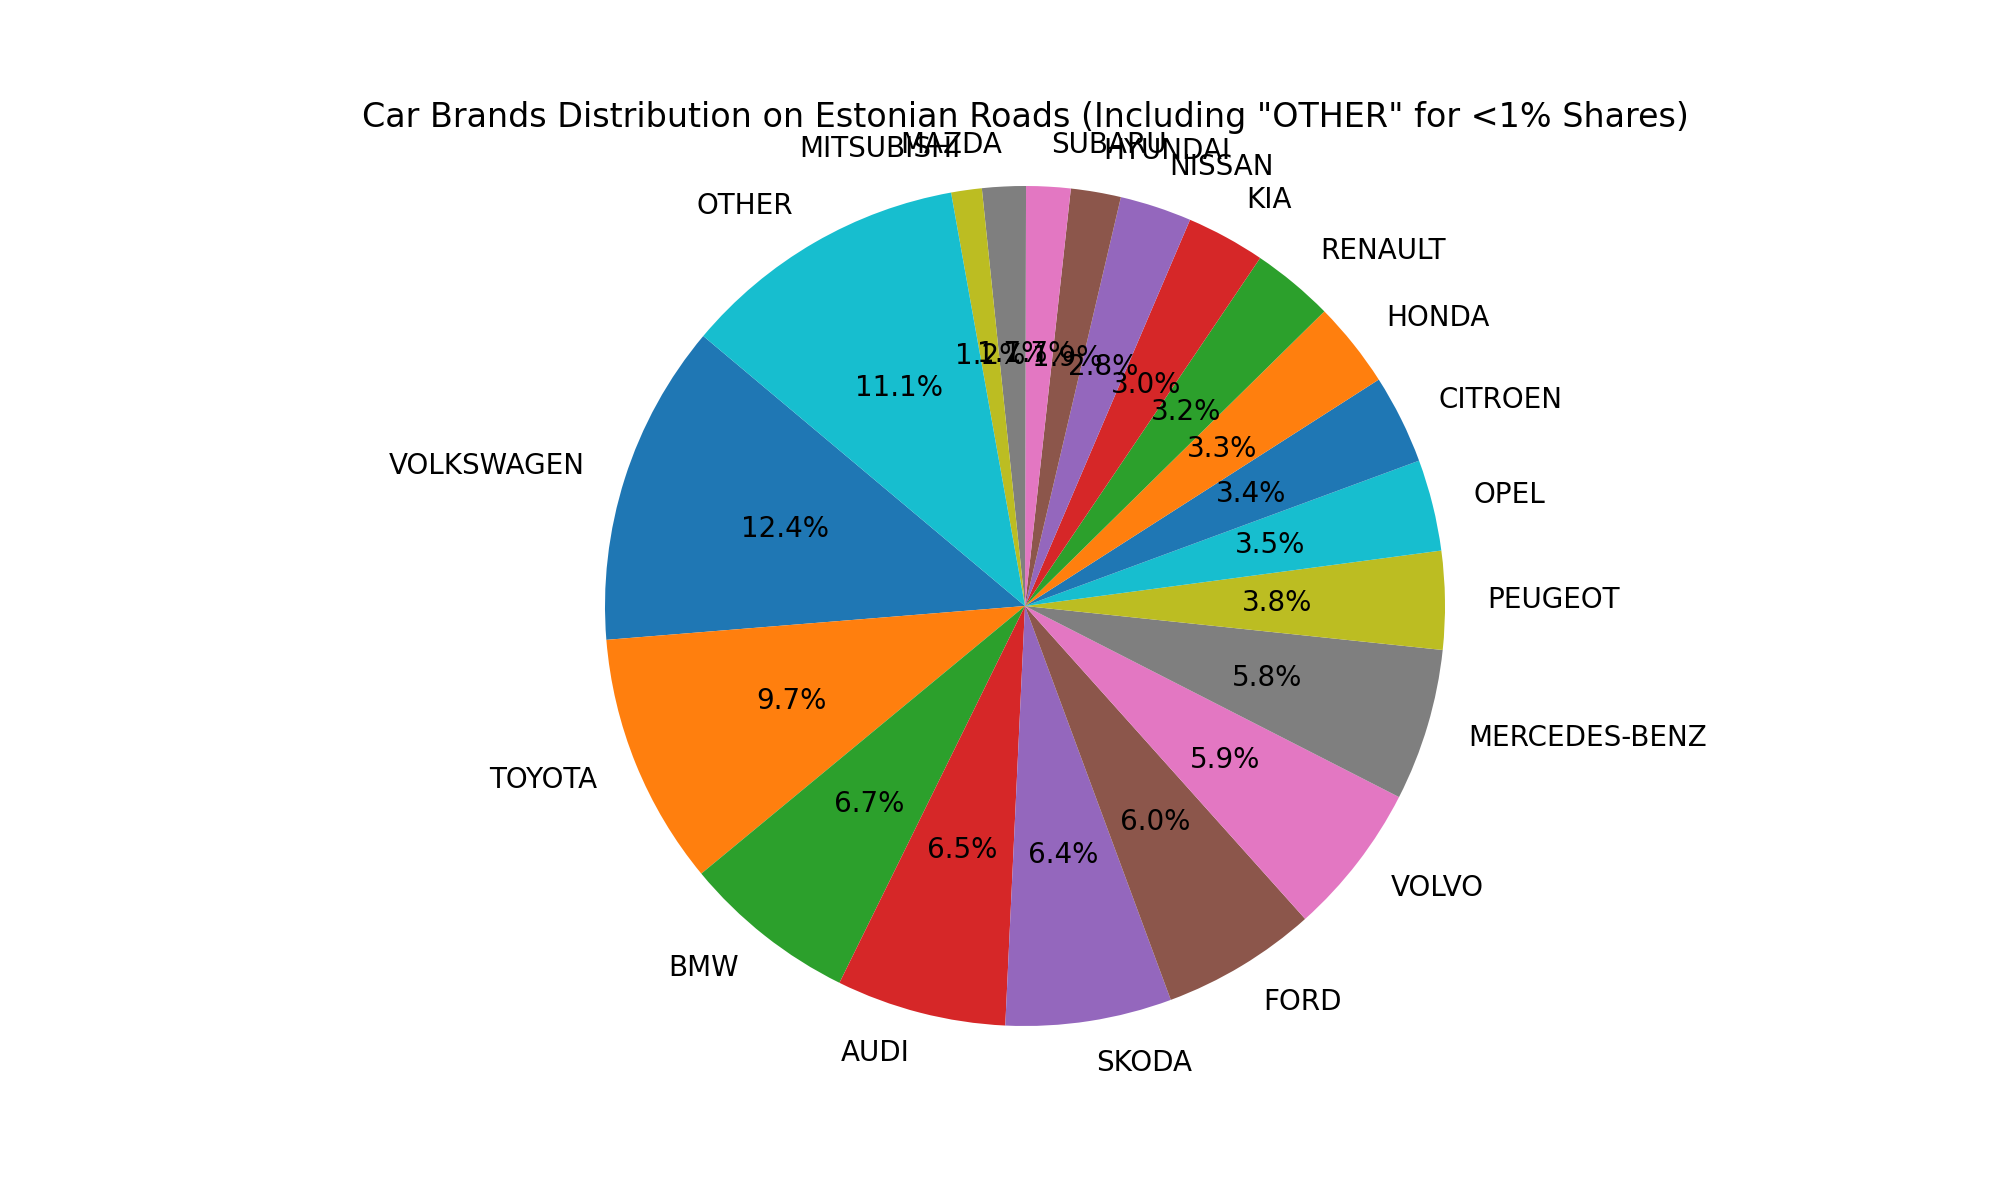

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Check the column names
print(data_status.columns)

# If 'MARK' is the correct column name, this should work
brand_counts = data_status['Mark'].value_counts()

# Calculate the total number of registered vehicles
total_vehicles = brand_counts.sum()

# Calculate the percentage share of each brand
brand_counts_percentage = (brand_counts / total_vehicles) * 100

# Clump together brands with less than 1% share into 'OTHER'
other_brands_total = brand_counts_percentage[brand_counts_percentage < 1].sum()
brand_counts_clumped = brand_counts_percentage[brand_counts_percentage >= 1]
if other_brands_total > 0:
    brand_counts_clumped['OTHER'] = other_brands_total

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(brand_counts_clumped, labels=brand_counts_clumped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Car Brands Distribution on Estonian Roads (Including "OTHER" for <1% Shares)')

# Save the plot to the specified path before displaying it
plt.savefig('img/cars_brand_distribution.png', dpi=DPI, transparent=True)

# Display the plot
plt.show()